Accuracy on test set: 0.875
Confusion Matrix:
[[0 1]
 [0 7]]
Top LDA features contributing to class separation:
TIVA_Lip Suck_min           0.109368
EEG_Gamma_TP9_min          -0.095989
GSR_GSR RAW_std             0.086057
EEG_Accelerometer_X_mean    0.081542
EEG_Accelerometer_Z_mean    0.076533
GSR_Timestamp RAW_mean      0.073278
GSR_Timestamp RAW_std      -0.072897
IVT_Gaze X_mean             0.072397
EEG_Gyro_Z_mean            -0.071909
TIVA_Sadness_max           -0.071826
dtype: float64


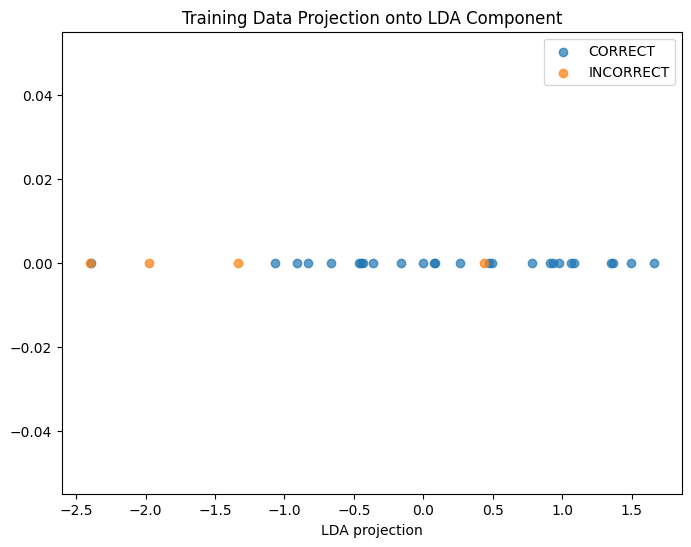

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import joblib

# Load preprocessed features and targets
X = pd.read_csv('features_preprocessed.csv')
y = pd.read_csv('targets.csv')

# Select a binary classification target variable, e.g., 'TARGET_verdict' with classes 'CORRECT' and 'INCORRECT'
# Encode target labels if necessary (e.g., map 'CORRECT' -> 1 and 'INCORRECT' -> 0)
y_label = y['TARGET_verdict'].map({'CORRECT': 1, 'INCORRECT': 0})

# If needed, drop samples with missing target labels
X = X[~y_label.isna()]
y_label = y_label.dropna()

# Standardize features (mean=0, std=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train/test sets (optional but recommended)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_label, test_size=0.2, random_state=42, stratify=y_label)

# Create and train LDA model
lda = LinearDiscriminantAnalysis(n_components=1)
X_train_lda = lda.fit_transform(X_train, y_train)

# Transform test data
X_test_lda = lda.transform(X_test)

# Evaluate using simple logistic regression for classification on LDA output
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_lda, y_train)
y_pred = logreg.predict(X_test_lda)

# Performance metrics
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f"Accuracy on test set: {acc}")
print("Confusion Matrix:")
print(cm)

# Get LDA coefficients (which features contribute most)
coefficients = lda.coef_[0]
feature_names = X.columns
important_features = pd.Series(coefficients, index=feature_names).sort_values(key=abs, ascending=False)
print("Top LDA features contributing to class separation:")
print(important_features.head(10))

# Optional: plot projection of samples on LDA axis colored by class
plt.figure(figsize=(8,6))
plt.scatter(X_train_lda[y_train==1], np.zeros_like(X_train_lda[y_train==1]), label='CORRECT', alpha=0.7)
plt.scatter(X_train_lda[y_train==0], np.zeros_like(X_train_lda[y_train==0]), label='INCORRECT', alpha=0.7)
plt.legend()
plt.xlabel('LDA projection')
plt.title('Training Data Projection onto LDA Component')
plt.show()
